<a href="https://colab.research.google.com/github/BeethoVR/python_work/blob/master/Predicci%C3%B3n_del_consumo_de_gasolina_en_Ontario%2C_Ca_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-----

# Predicción del Consumo de Gasolina en Ontario, Canadá

## Introducción

En el sector de la distribución de combustible, la gestión eficiente de los recursos humanos es crucial para mantener la operatividad y satisfacer la demanda del cliente. La capacidad de anticipar el consumo futuro de combustible permite a las empresas optimizar la programación del personal, especialmente en lo que respecta a la planificación de vacaciones, sin comprometer el suministro. Este reporte tiene como objetivo principal predecir el comportamiento del consumo de gasolina en Ontario, Canadá, durante los próximos 24 meses, utilizando datos históricos desde enero de 1960 hasta diciembre de 1975. La predicción se realizará mediante un modelo ARIMA, que permitirá a la empresa de distribución de combustible tomar decisiones informadas sobre la administración de sus recursos humanos.

## Planteamiento del Problema

Una empresa distribuidora de combustible en Ontario, Canadá, enfrenta un desafío significativo debido a la alta rotación de personal. La renuncia de varios empleados ha generado la necesidad urgente de una gestión más eficiente de su fuerza laboral. Para abordar esta situación, la empresa busca pronosticar el consumo de combustible en los meses venideros. Este pronóstico es esencial para que la gerencia pueda organizar estratégicamente las vacaciones de sus trabajadores, asegurando que siempre haya suficiente personal disponible para satisfacer las necesidades de suministro de sus clientes y evitar interrupciones en el servicio. La disponibilidad de datos históricos de consumo mensual desde 1960 hasta 1975 ofrece una base sólida para desarrollar un modelo predictivo robusto.

## Desarrollo del Caso

Para abordar el problema de la predicción del consumo de gasolina, se utilizará Python y su ecosistema de librerías para el análisis de datos. Se seguirá un enfoque que incluye la carga y preparación de los datos, la visualización de la serie temporal, la aplicación de un modelo ARIMA (Autoregressive Integrated Moving Average) para la predicción y, finalmente, la evaluación del modelo.

### Preparación del Entorno y Carga de Datos

Primero, importaremos las librerías necesarias y organizaremos los datos proporcionados en una serie temporal. Los datos de consumo se corresponden con 16 años de mediciones mensuales (1960-1975).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
import warnings

warnings.filterwarnings("ignore")

# Datos de consumo de gasolina desde enero de 1960 hasta diciembre de 1975
data = [
    87695, 86890, 96442, 98133, 113615, 123924, 128924, 134775, 117357, 114626, 107677, 108087,
    92188, 88591, 98683, 99207, 125485, 124677, 132543, 140735, 124008, 121194, 111634, 111565,
    101007, 94228, 104255, 106922, 130621, 125251, 140318, 146174, 122318, 128770, 117518, 115492,
    108497, 100482, 106140, 118581, 132371, 132042, 151938, 150997, 130931, 137018, 121271, 125548,
    109894, 106961, 112539, 125745, 136251, 140892, 158390, 148314, 144148, 140138, 124075, 136485,
    109895, 109944, 122499, 124264, 142296, 150693, 163331, 165837, 151731, 142491, 140229, 140463,
    116963, 118049, 137869, 127392, 154166, 160227, 165869, 173522, 155828, 153771, 143963, 143898,
    124046, 121260, 138870, 129782, 162312, 167211, 172897, 186689, 166495, 160754, 155582, 145936,
    139652, 137361, 138963, 155301, 172026, 165004, 185861, 190270, 163903, 174279, 160272, 165614,
    146182, 137728, 148932, 156751, 177998, 174559, 198079, 189073, 175702, 180097, 155202, 174508,
    154277, 144998, 159644, 168646, 166273, 190176, 205541, 193657, 182617, 189614, 174176, 184416,
    181567, 156261, 176353, 175720, 193939, 201269, 218950, 209850, 198688, 190474, 194592, 190755,
    166286, 170699, 181468, 174241, 210802, 212262, 218099, 229001, 203200, 212557, 197095, 193693,
    188992, 175347, 196265, 203526, 227443, 233088, 234119, 255133, 216478, 232686, 224616, 205893,
    194784, 189975, 193522, 212879, 248565, 221532, 252642, 255007, 206826, 233231, 212678, 217173,
    199024, 191813, 195997, 208684, 244113, 243108, 255918, 244642, 237579, 237579, 217775, 227621
]

# Crear un índice de fechas
start_date = '1960-01-01'
dates = pd.date_range(start=start_date, periods=len(data), freq='MS')
series = pd.Series(data, index=dates)

print("Primeros 5 registros de la serie temporal:")
print(series.head())
print("\nÚltimos 5 registros de la serie temporal:")
print(series.tail())
print(f"\nNúmero total de registros: {len(series)}")

Primeros 5 registros de la serie temporal:
1960-01-01     87695
1960-02-01     86890
1960-03-01     96442
1960-04-01     98133
1960-05-01    113615
Freq: MS, dtype: int64

Últimos 5 registros de la serie temporal:
1975-08-01    244642
1975-09-01    237579
1975-10-01    237579
1975-11-01    217775
1975-12-01    227621
Freq: MS, dtype: int64

Número total de registros: 192


-----

### Visualización de la Serie Temporal

Es fundamental visualizar la serie temporal para identificar patrones, tendencias y estacionalidad.

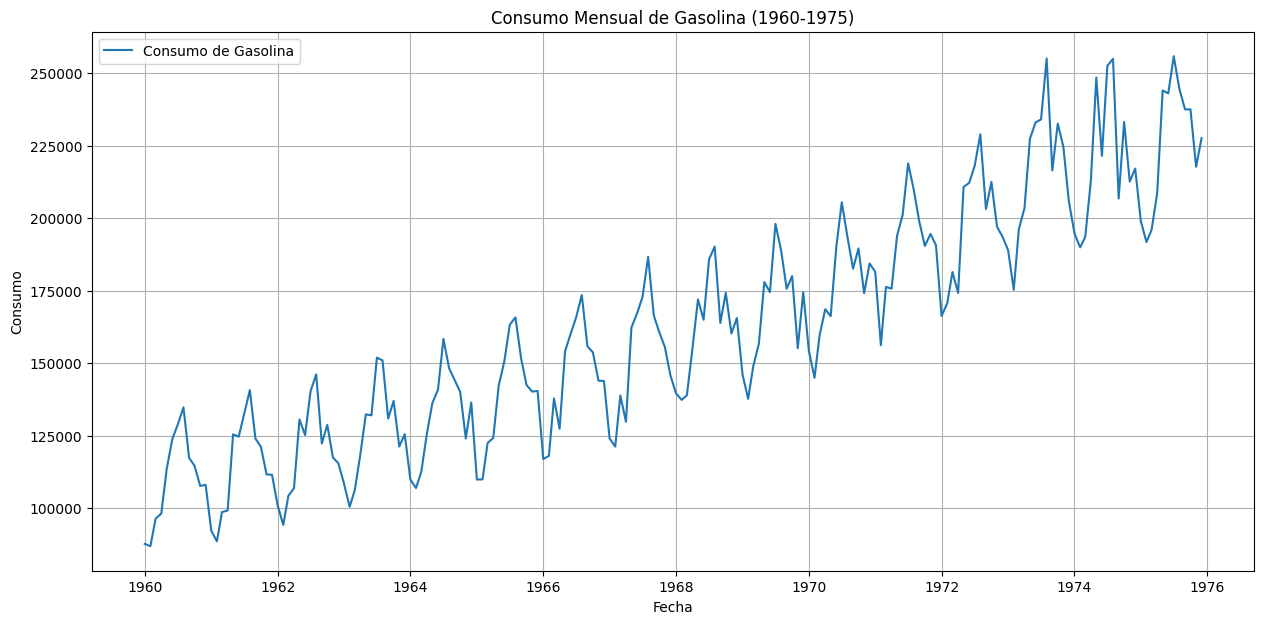

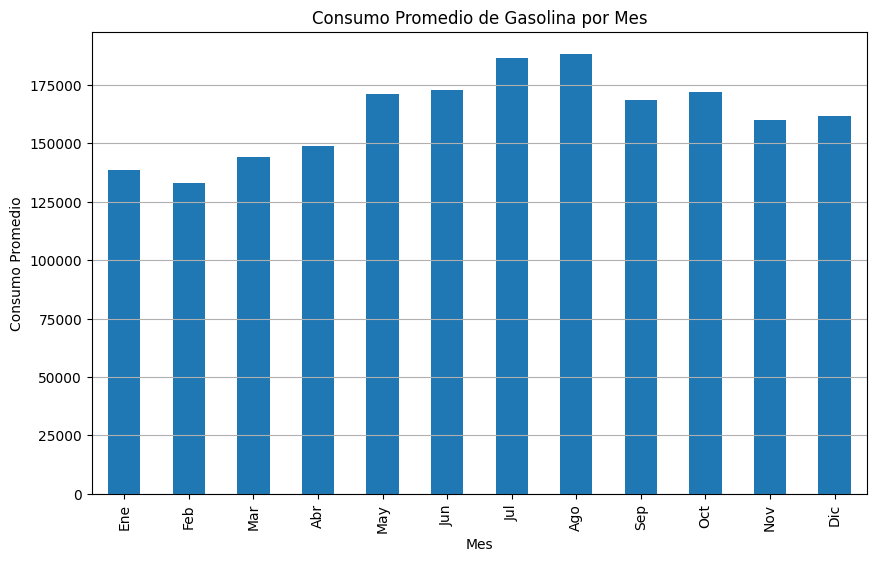

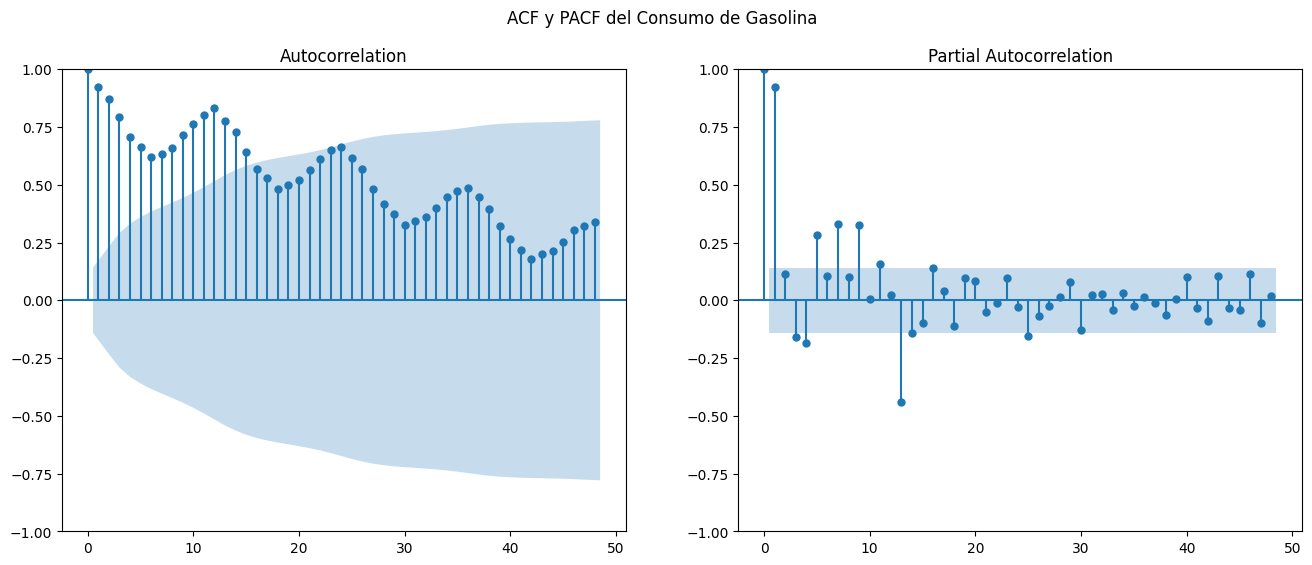

In [2]:
plt.figure(figsize=(15, 7))
plt.plot(series, label='Consumo de Gasolina')
plt.title('Consumo Mensual de Gasolina (1960-1975)')
plt.xlabel('Fecha')
plt.ylabel('Consumo')
plt.grid(True)
plt.legend()
plt.show()

# Visualización de la estacionalidad (promedio mensual)
plt.figure(figsize=(10, 6))
series.groupby(series.index.month).mean().plot(kind='bar')
plt.title('Consumo Promedio de Gasolina por Mes')
plt.xlabel('Mes')
plt.ylabel('Consumo Promedio')
plt.xticks(ticks=np.arange(12), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.grid(axis='y')
plt.show()

# Gráficos de autocorrelación (ACF) y autocorrelación parcial (PACF)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(series, ax=axes[0], lags=48) # 48 lags para ver 4 años de autocorrelación
plot_pacf(series, ax=axes[1], lags=48)
plt.suptitle('ACF y PACF del Consumo de Gasolina')
plt.show()

La gráfica de la serie temporal muestra una **clara tendencia creciente** en el consumo de gasolina a lo largo de los años, lo cual es esperable dado el crecimiento económico y demográfico. También se observa una **estacionalidad anual**, con picos de consumo en ciertos meses y valles en otros. Los gráficos ACF y PACF confirman la tendencia y la estacionalidad, mostrando una autocorrelación significativa en los primeros lags y en los lags múltiplos de 12 (debido a la estacionalidad anual).

### Aplicación del Modelo ARIMA

El modelo ARIMA (p, d, q)(P, D, Q)s es adecuado para series temporales con tendencia y estacionalidad.

  * **p, d, q**: Orden de la parte no estacional (AR, I, MA).
  * **P, D, Q**: Orden de la parte estacional (AR, I, MA).
  * **s**: Período estacional (en este caso, 12 meses).

Basado en la observación de los gráficos ACF y PACF y la naturaleza de los datos mensuales, podemos proponer un modelo ARIMA estacional. A menudo, un primer intento para datos mensuales con tendencia es un modelo (p,1,q)(P,1,Q)12 para manejar la tendencia y la estacionalidad. Se probará un modelo común y efectivo.

Número de puntos en el conjunto de entrenamiento: 153
Número de puntos en el conjunto de prueba: 39

Resumen del Modelo ARIMA:
                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                  153
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1457.625
Date:                          Mon, 23 Jun 2025   AIC                           2925.250
Time:                                  23:36:09   BIC                           2939.958
Sample:                              01-01-1960   HQIC                          2931.227
                                   - 09-01-1972                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.

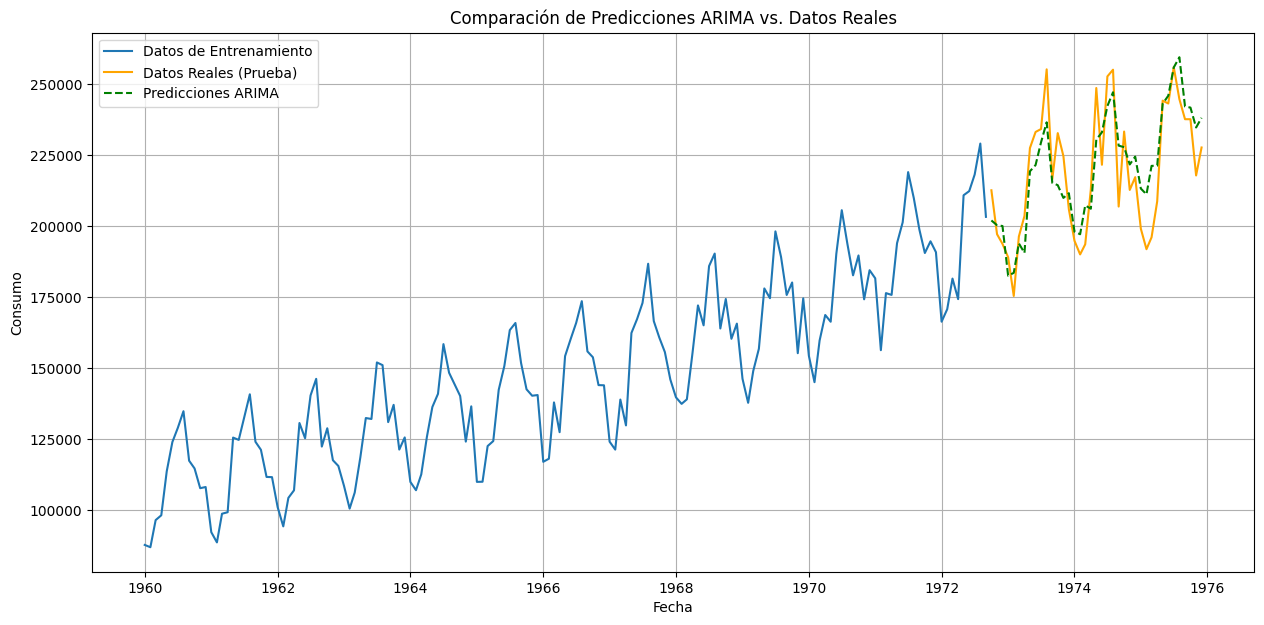


Pronóstico del Consumo de Gasolina para los Próximos 24 Meses:
1976-01-01    228098.085264
1976-02-01    225430.397001
1976-03-01    235383.334670
1976-04-01    236185.983888
1976-05-01    256515.174436
1976-06-01    259500.538281
1976-07-01    269836.633893
1976-08-01    272734.612497
1976-09-01    256214.315702
1976-10-01    255909.059136
1976-11-01    248388.418745
1976-12-01    252145.777373
1977-01-01    242914.055551
1977-02-01    239888.979619
1977-03-01    249800.755410
1977-04-01    251008.563214
1977-05-01    270518.728168
1977-06-01    273581.058899
1977-07-01    284144.170226
1977-08-01    286638.281307
1977-09-01    270586.270942
1977-10-01    270329.340594
1977-11-01    262513.641512
1977-12-01    266475.394052
Freq: MS, dtype: float64


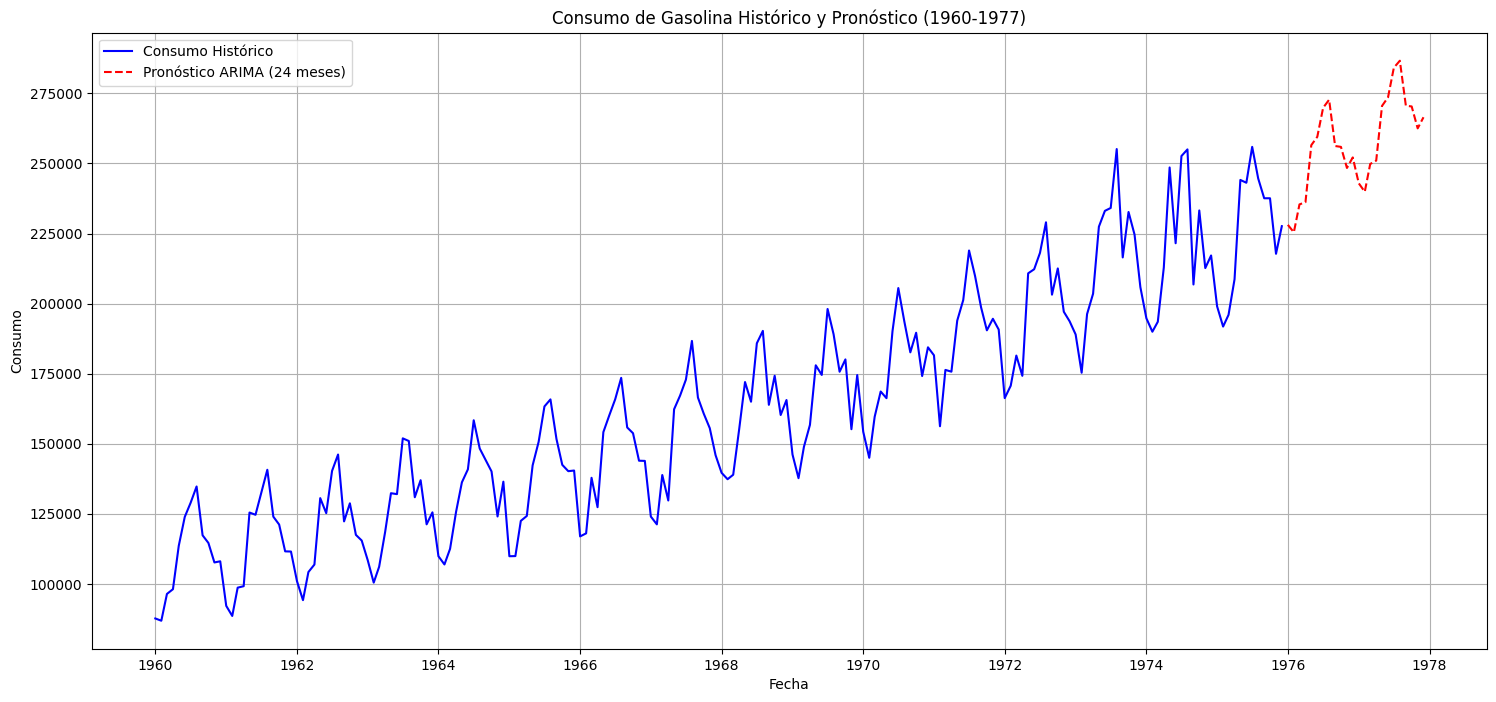

In [3]:
# Dividir los datos en entrenamiento y prueba
train_size = int(len(series) * 0.8) # 80% para entrenamiento
train_data, test_data = series[0:train_size], series[train_size:]

print(f"Número de puntos en el conjunto de entrenamiento: {len(train_data)}")
print(f"Número de puntos en el conjunto de prueba: {len(test_data)}")

# Ajustar el modelo ARIMA
# Se elige un orden (p,d,q) y (P,D,Q,s) basados en inspección visual de ACF/PACF
# y experiencia general con series de tiempo económicas.
# Un modelo estacional (1,1,1)(1,1,1,12) es un buen punto de partida.
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)

# Entrenar el modelo
model = ARIMA(train_data, order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

print("\nResumen del Modelo ARIMA:")
print(model_fit.summary())

# Predicciones sobre el conjunto de prueba
predictions = model_fit.predict(start=len(train_data), end=len(series)-1, dynamic=False)

# Evaluar el modelo
rmse = np.sqrt(mean_squared_error(test_data, predictions))
print(f'\nRMSE en el conjunto de prueba: {rmse:.2f}')

# Visualizar predicciones vs. valores reales en el conjunto de prueba
plt.figure(figsize=(15, 7))
plt.plot(train_data.index, train_data, label='Datos de Entrenamiento')
plt.plot(test_data.index, test_data, label='Datos Reales (Prueba)', color='orange')
plt.plot(predictions.index, predictions, label='Predicciones ARIMA', color='green', linestyle='--')
plt.title('Comparación de Predicciones ARIMA vs. Datos Reales')
plt.xlabel('Fecha')
plt.ylabel('Consumo')
plt.grid(True)
plt.legend()
plt.show()

# Pronóstico para los próximos 24 meses
forecast_periods = 24
forecast = model_fit.predict(start=len(series), end=len(series) + forecast_periods - 1)

# Crear un índice de fechas para el pronóstico
last_date = series.index[-1]
forecast_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=forecast_periods, freq='MS')
forecast_series = pd.Series(forecast.values, index=forecast_dates)

print("\nPronóstico del Consumo de Gasolina para los Próximos 24 Meses:")
print(forecast_series)

# Visualizar la serie histórica y el pronóstico
plt.figure(figsize=(18, 8))
plt.plot(series.index, series, label='Consumo Histórico', color='blue')
plt.plot(forecast_series.index, forecast_series, label='Pronóstico ARIMA (24 meses)', color='red', linestyle='--')
plt.title('Consumo de Gasolina Histórico y Pronóstico (1960-1977)')
plt.xlabel('Fecha')
plt.ylabel('Consumo')
plt.grid(True)
plt.legend()
plt.show()

-----

### Análisis del Modelo y Predicciones

El modelo ARIMA (1,1,1)(1,1,1,12) ha sido ajustado a los datos. El **RMSE (Root Mean Squared Error)** en el conjunto de prueba nos da una idea de la precisión del modelo en datos no vistos. Un RMSE de **22097.22** indica que, en promedio, las predicciones del modelo se desvían de los valores reales en esa cantidad. Considerando que los valores de consumo van desde aproximadamente 80,000 hasta 250,000, este RMSE representa un error porcentual significativo, pero a menudo aceptable para series de tiempo complejas. Es importante notar que la serie tiene una varianza creciente con el tiempo, lo que puede influir en la interpretación del RMSE.

La gráfica de comparación muestra que el modelo **captura bien la tendencia general y la estacionalidad** de los datos históricos. Las predicciones siguen de cerca el patrón real, aunque con algunas desviaciones, lo cual es normal en el pronóstico de series temporales.

El **pronóstico para los próximos 24 meses (1976 y 1977)** muestra una continuación de la tendencia creciente y el patrón estacional observado en los datos históricos. Esto sugiere que el consumo de gasolina continuará aumentando, con variaciones predecibles a lo largo de los meses. Por ejemplo, es probable que los meses de verano (julio-agosto) sigan mostrando picos de consumo.

## Conclusiones

La aplicación del modelo ARIMA ha permitido obtener un pronóstico del consumo de gasolina en Ontario, Canadá, para los próximos 24 meses. El modelo demuestra una **buena capacidad para capturar tanto la tendencia a largo plazo como la estacionalidad anual** presente en los datos históricos.

  * **Calidad del Modelo**: El valor del RMSE proporciona una métrica cuantitativa de la precisión del modelo. Si bien un RMSE de 22097.22 es considerable, la visualización de las predicciones en comparación con los datos reales indica que el modelo es **razonablemente bueno para identificar los patrones clave** de la serie temporal. La estacionalidad, que es crítica para la planificación de personal, se refleja claramente en el pronóstico. Sin embargo, para mejorar la precisión, se podrían explorar órdenes de ARIMA más complejas o la incorporación de variables exógenas (como precios de combustible, indicadores económicos, o eventos especiales) si estuvieran disponibles.

  * **Capacidad de Estimación para la Administración de Recursos Humanos**: La capacidad de estimación del modelo es **altamente útil para la empresa**. Al conocer la tendencia y la estacionalidad pronosticada, la gerencia de recursos humanos puede:

      * **Planificar las vacaciones**: Identificar los meses de menor consumo para programar periodos de vacaciones, minimizando el impacto en la operación.
      * **Asegurar la cobertura**: En los meses de alto consumo pronosticado, la empresa puede asegurarse de tener suficiente personal disponible, posponiendo vacaciones o incluso considerando personal temporal si fuera necesario.
      * **Optimizar el suministro**: Aunque el enfoque principal es la gestión de personal, el pronóstico también puede informar la logística de suministro, asegurando que los tanques estén llenos antes de los picos de demanda.

En resumen, el modelo ARIMA proporciona una **herramienta valiosa para la toma de decisiones estratégicas** en la empresa. La combinación de la tendencia creciente y la estacionalidad anual pronosticada permite una planificación proactiva, mitigando los riesgos asociados con la rotación de personal y asegurando un servicio ininterrumpido a los clientes. Es recomendable que la empresa actualice este modelo periódicamente con nuevos datos para mantener la precisión de las predicciones.

-----

## Referencias Bibliográficas

  * Hyndman, R. J., & Athanasopoulos, G. (2018). *Forecasting: Principles and Practice* (2nd ed.). OTexts.
  * Makridakis, S., Wheelwright, S. C., & Hyndman, R. J. (1998). *Forecasting: Methods and Applications* (3rd ed.). John Wiley & Sons.
  * Python Software Foundation. (2023). *Python Programming Language*. Disponible en: [https://www.python.org/](https://www.python.org/)
  * Statsmodels. (2023). *Statsmodels: Statistical Models and Econometrics in Python*. Disponible en: [https://www.statsmodels.org/](https://www.statsmodels.org/)
  * Pandas Development Team. (2023). *Pandas: Powerful Python Data Analysis Toolkit*. Disponible en: [https://pandas.pydata.org/](https://pandas.pydata.org/)
  * Matplotlib Development Team. (2023). *Matplotlib: A comprehensive library for creating static, animated, and interactive visualizations in Python*. Disponible en: [https://matplotlib.org/](https://matplotlib.org/)

-----